In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
import statsmodels.formula.api as smf
import scipy.stats as stats

# 4.1 sleep equation #1

In [4]:
sleep_df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')

In [5]:
sleep_df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


In [6]:
sleep_df['sleep60'] = sleep_df['sleep']/60
sleep_df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq,sleep60
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,3438,0,3438,0,14,0,13,7.070004,1024,51.883333
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,5020,0,5020,0,11,0,0,1.429999,961,48.666667
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,2815,0,2815,0,21,0,0,20.529997,1936,44.500000
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,3786,0,3786,0,12,0,12,9.619998,900,51.383333
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,2580,0,2580,0,44,0,33,2.750000,4096,57.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,2026,0,2026,0,27,0,18,NaN,2025,49.750000
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,675,1,465,210,18,0,4,NaN,1156,58.666667
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1851,0,1851,0,19,0,17,NaN,1369,58.500000
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1961,1,1481,480,31,0,22,NaN,2916,49.500000


In [7]:
sleep_male = sleep_df[sleep_df['male']==1] 
sleep_female = sleep_df[sleep_df['male']==0]

In [8]:

slp = smf.ols(data= sleep_df, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()
slp_ml = smf.ols(data= sleep_male, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()
slp_fml = smf.ols(data= sleep_female, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()

In [9]:

print(f'RSS:{slp.ssr.round(2)}, RSS Male:{slp_ml.ssr.round(2)},RSS Female:{slp_fml.ssr.round(2)} ')

RSS:33859.8, RSS Male:17618.98,RSS Female:15717.91 


In [10]:
F_obs =( slp.ssr - (slp_ml.ssr + slp_fml.ssr) )/((slp_ml.ssr + slp_fml.ssr)) * (len( sleep_female ) + len( sleep_male ) - 14) / 7
F_obs.round(2)

1.55

In [11]:

alpha = 0.01
F_cr = stats.f.ppf(1-alpha,7,706-7)
F_cr

2.664892952419547

Вывод: Fobs<Fcr
 данные согласуются с гипотезой Н0. Структурные различия незначимы

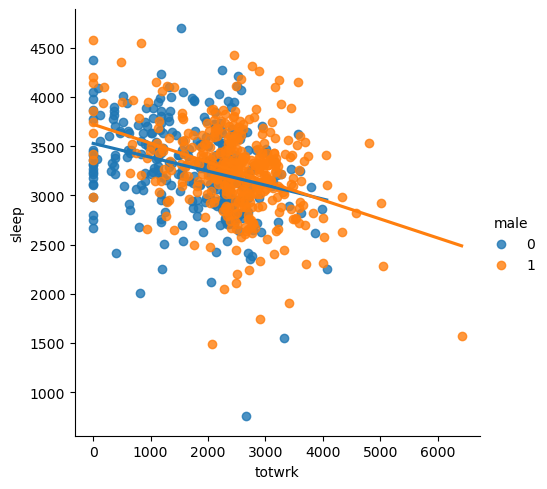

In [12]:
sns.lmplot(data=sleep_df,x='totwrk', y='sleep', ci=None, hue='male')

# 4.2 sleep equation #2

In [27]:
sleep_df['sleep60'] = sleep_df['sleep']/60
sleep_df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq,sleep60
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,3438,0,3438,0,14,0,13,7.070004,1024,51.883333
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,5020,0,5020,0,11,0,0,1.429999,961,48.666667
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,2815,0,2815,0,21,0,0,20.529997,1936,44.500000
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,3786,0,3786,0,12,0,12,9.619998,900,51.383333
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,2580,0,2580,0,44,0,33,2.750000,4096,57.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,2026,0,2026,0,27,0,18,NaN,2025,49.750000
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,675,1,465,210,18,0,4,NaN,1156,58.666667
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1851,0,1851,0,19,0,17,NaN,1369,58.500000
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1961,1,1481,480,31,0,22,NaN,2916,49.500000


In [28]:
sleep_south = sleep_df[sleep_df['south']==1] 
sleep_north = sleep_df[sleep_df['south']==0]

In [32]:

slp = smf.ols(data= sleep_df, formula='sleep60~totwrk+age+I(age**2)+male+smsa').fit()
slp_st = smf.ols(data= sleep_south, formula='sleep60~totwrk+age+I(age**2)+male+smsa').fit()
slp_nt = smf.ols(data= sleep_north, formula='sleep60~totwrk+age+I(age**2)+male+smsa').fit()

In [33]:
print(f'RSS:{slp.ssr.round(2)}, RSS Male:{slp_ml.ssr.round(2)},RSS Female:{slp_fml.ssr.round(2)} ')

RSS:33860.55, RSS Male:17673.34,RSS Female:15997.7 


In [34]:
F_obs =( slp.ssr - (slp_st.ssr + slp_nt.ssr) )/((slp_st.ssr + slp_nt.ssr)) * (len( sleep_south ) + len( sleep_north ) - 12) / 6
F_obs.round(2)

2.65

In [35]:
alpha = 0.05
F_cr = stats.f.ppf(1-alpha,6,706-7)
F_cr

2.11153241929136

Вывод: Fobs>Fcr
 данные согласуются с гипотезой Н1. Структурные различия значимы

# 4.3 wage equation #1

In [36]:
df_wage = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/wage1.csv')
df_wage

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


In [47]:
wage_male = df_wage[df_wage['female']==0] 
wage_female = df_wage[df_wage['female']==1]

In [48]:

wage = smf.ols(data= df_wage, formula='np.log(wage)~exper+I(exper^2)+married+smsa').fit()
wage_ml = smf.ols(data= wage_male, formula='np.log(wage)~exper+I(exper^2)+married+smsa').fit()
wage_fml = smf.ols(data= wage_female, formula='np.log(wage)~exper+I(exper^2)+married+smsa').fit()

In [49]:
print(f'RSS:{wage.ssr.round(2)}, RSS Male:{wage_ml.ssr.round(2)},RSS Female:{wage_fml.ssr.round(2)} ')

RSS:129.42, RSS Male:60.88,RSS Female:46.25 


In [51]:
F_obs =( wage.ssr - (wage_ml.ssr + wage_fml.ssr) )/((wage_ml.ssr + wage_fml.ssr)) * (len( wage_male ) + len( wage_female ) - 2*5) / 5
F_obs.round(2)

21.47

In [52]:
alpha = 0.05
F_cr = stats.f.ppf(1-alpha,5,536-5)
F_cr

2.2309908341868914

Вывод: Fobs>Fcr
 данные согласуются с гипотезой Н1. Структурные различия значимы

# 4.4 wage equation #2

In [53]:
df_wage = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/wage1.csv')
df_wage

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


In [66]:
wage_married = df_wage[df_wage['married']==1] 
wage_single = df_wage[df_wage['married']==0]

In [67]:
wage = smf.ols(data= df_wage, formula='np.log(wage)~exper+I(exper^2)+female+smsa').fit()
wage_mr = smf.ols(data= wage_married, formula='np.log(wage)~exper+I(exper^2)+female+smsa').fit()
wage_sg = smf.ols(data= wage_single, formula='np.log(wage)~exper+I(exper^2)+female+smsa').fit()

In [70]:
print(f'RSS:{wage.ssr.round(2)}, RSS marr:{wage_mr.ssr.round(2)},RSS single:{wage_sg.ssr.round(2)} ')

RSS:119.14, RSS marr:60.43,RSS single:45.16 


In [71]:
F_obs =( wage.ssr - (wage_mr.ssr + wage_sg.ssr) )/((wage_mr.ssr + wage_sg.ssr)) * (len( wage_married ) + len( wage_single ) - 2*5) / (5)
F_obs.round(2)

13.24

In [72]:
alpha = 0.05
F_cr = stats.f.ppf(1-alpha,5,536-5)
F_cr

2.2309908341868914

Вывод: Fobs>Fcr
 данные согласуются с гипотезой Н1. Структурные различия значимы